# Cypherbyte Technologies Internship
**MEHWISH ZAMAN**

DATA SCIENCE INTERN

 Task 2:


"UNEMPLOYEMENT ANALYSIS WITH PYTHON"

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.

In [ ]:
!pip install statsmodels

# **Data preprocessing.**

In [ ]:
import pandas as pd
df = pd.read_excel('/content/Unemployment in India.xlsx')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-10-b9c6864122be>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


# **Exploratory data analysis (EDA)**

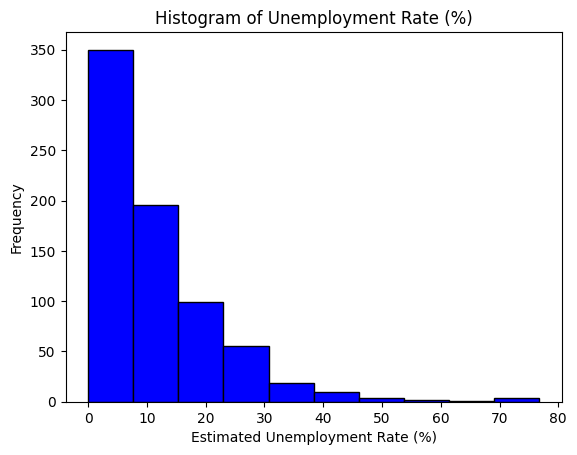

In [ ]:
plt.hist(df['Estimated Unemployment Rate (%)'], bins= 10, color = 'blue', edgecolor = 'black')
plt.title("Histogram of Unemployment Rate (%)")
plt.xlabel("Estimated Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.show()

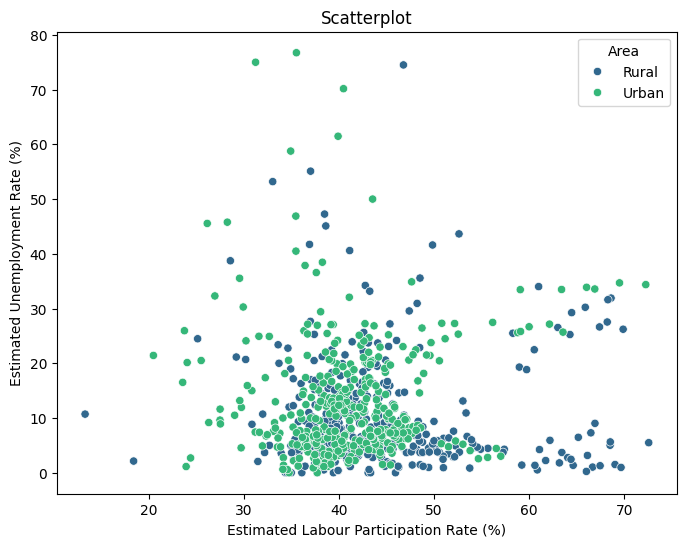

In [ ]:
import seaborn as sns
plt.figure(figsize = (8,6))
sns.scatterplot(x = "Estimated Labour Participation Rate (%)", y = 'Estimated Unemployment Rate (%)', data = df , hue ='Area', palette = 'viridis' )
plt.title("Scatterplot")
plt.xlabel("Estimated Labour Participation Rate (%)")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.show()

# **TIME-SERIES FORCASTING USING ARIMA**

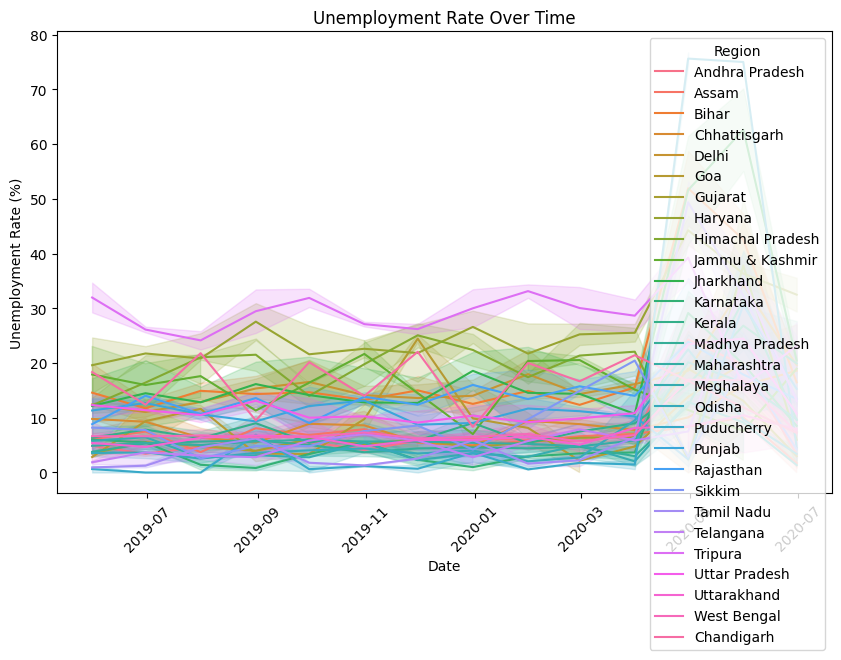

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, hue='Region')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

# **CORRELATION MAP**

<ipython-input-15-22c33e2d0e74>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


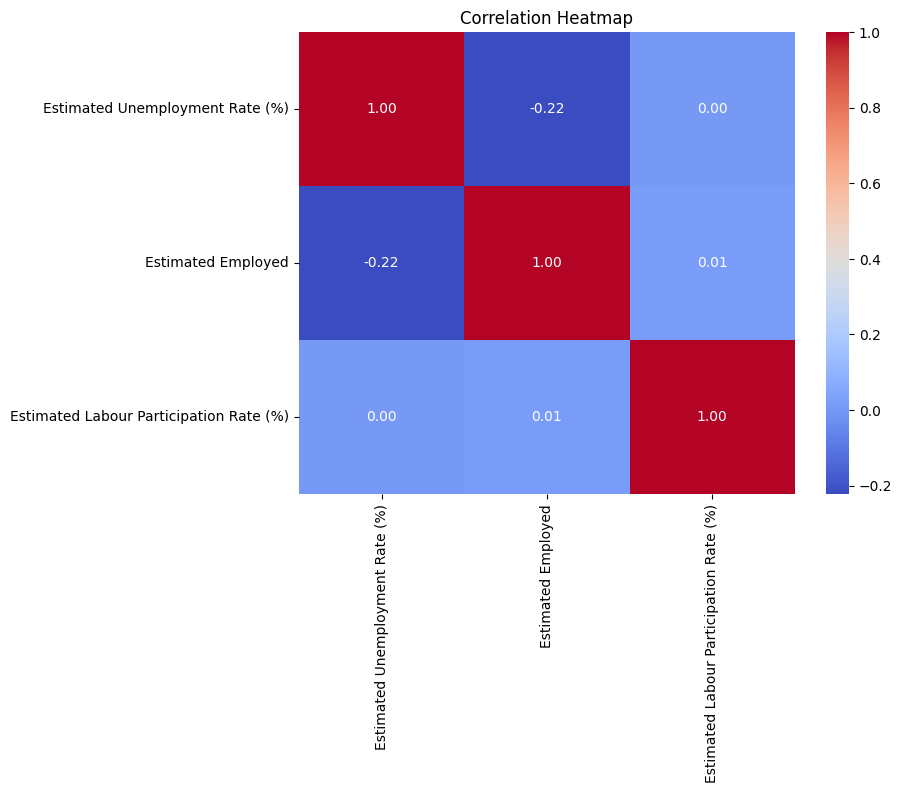

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

train, test = train_test_split(df, test_size=0.2, shuffle=False)

In [ ]:
model = ARIMA(train['Estimated Unemployment Rate (%)'], order=(5,1,0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
